<img align="center" style="max-width: 1000px" src="../assets/banner.png?raw=1">

<img align="right" style="max-width: 200px; height: auto" src="https://raw.githubusercontent.com/HSG-AIML-Teaching/EMBA2026-Lab/main/assets/hsg_logo.png?raw=1">

##  Lab 03 - Supervised Machine Learning: Naive Bayes

EMBA: Coding und Künstliche Intelligenz, University of St. Gallen

The lab environment of the "Coding und Künstliche Intelligenz" EMBA course at the University of St. Gallen (HSG) is based on Jupyter Notebooks (https://jupyter.org), which allow to perform a variety of statistical evaluations and data analyses.

In the last lab, you learned about several Python programming elements such as conditions, loops as well as how to implement functions etc. In this third lab, we will build our first **supervised machine learning classification "pipelines"** using a classifier named the **Gaussian Naive-Bayes (GNB)** classifier.

The *generative* **Naive-Bayes (NB)** classifier belongs to the family of simple "probabilistic classifiers" based on applying Bayes' theorem with a strong (naive) independence assumptions between the features. Naive Bayes has been studied extensively since the 1950s and remains an accessible (baseline) method for text categorization as well as other domains.

This classification technique is part of the **generative** type of classifiers, which can be distinguished from the **discriminative** type as shown by the following illustration:

<img align="center" style="max-width: 800px; height: auto" src="https://raw.githubusercontent.com/HSG-AIML-Teaching/EMBA2026-Lab/main/lab_03/classifiers_generative.png">

(Courtesy: Intro to AI & ML lecture, Prof. Dr. Borth, University of St. Gallen)

As always, please don't hesitate to ask all your questions either during the lab, post them in our CANVAS (StudyNet) forum (https://learning.unisg.ch), or send us an email (using the course email).

## 1. Lab Objectives:

After today's lab you should be able to:

> 1. Know how to setup a **notebook or "pipeline"** that solves a simple supervised classification task.
> 2. Recognize the **data elements** needed to train and evaluate a supervised machine learning classifier. 
> 3. Understand how a generative Gaussian **Naive-Bayes (NB)** classifier can be trained and evaluated.
> 4. Know how to use Python's sklearn library to **train** and **evaluate** arbitrary classifiers.
> 5. Understand how to **evaluate** and **interpret** the classification results.

## 2. Setup of the Jupyter Notebook Environment

Similarly to the previous labs, we need to import a couple of Python libraries that allow for data analysis and data visualization. In this lab will use the `Pandas`, `Numpy`, `Scikit-Learn`, `Matplotlib` and the `Seaborn` library. Let's import the libraries by the execution of the statements below:

In [1]:
# import the numpy, scipy and pandas data science library
import pandas as pd
import numpy as np
from scipy.stats import norm

# import sklearn data and data pre-processing libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import sklearn naive.bayes classifier library
from sklearn.naive_bayes import GaussianNB

# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import confusion_matrix 

# import matplotlib data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

/Users/konstantinschurholt/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Enable inline Jupyter notebook plotting:

In [2]:
%matplotlib inline

Use the `Seaborn` plotting style in all subsequent visualizations:

In [3]:
plt.style.use('seaborn-v0_8')

/var/folders/0x/bs2wk7sn7wbb2m25x2rt400c0000gn/T/ipykernel_14181/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-v0_8')


## 3. Dataset Download and Pre-Processing

### 3.1 Dataset Download and Data Assessment

The **Iris Dataset** is a classic and straightforward dataset often used as a "Hello World" example in multi-class classification. This data set consists of measurements taken from three different types of iris flowers (referred to as **Classes**),  namely the Iris Setosa, the Iris Versicolour and the Iris Virginica, and their respective measured petal and sepal length (referred to as **Features**).

<img align="center" style="max-width: 700px; height: auto" src="https://raw.githubusercontent.com/HSG-AIML-Teaching/EMBA2026-Lab/main/lab_03/iris_dataset.png">

(Source: http://www.lac.inpe.br/~rafael.santos/Docs/R/CAP394/WholeStory-Iris.html)

In total, the dataset consists of **150 samples** (50 samples taken per class) as well as their corresponding **4 different measurements** taken for each sample. Please, find below the list of the individual measurements:

>- `Sepal length (cm)`
>- `Sepal width (cm)`
>- `Petal length (cm)`
>- `Petal width (cm)`

Further details of the dataset can be obtained from the following puplication: *Fisher, R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950)."*

Let's load the dataset and conduct a preliminary data assessment: 

In [4]:
iris = datasets.load_iris()

Print and inspect the names of the four features contained in the dataset:

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Determine and print the feature dimensionality of the dataset:

In [6]:
iris.data.shape

(150, 4)

Determine and print the class label dimensionality of the dataset:

In [7]:
iris.target.shape

(150,)

Print and inspect the names of the three classes contained in the dataset:

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's briefly envision how the feature information of the dataset is collected and presented in the data:

<img align="center" style="max-width: 900px; height: auto" src="https://raw.githubusercontent.com/HSG-AIML-Teaching/EMBA2026-Lab/main/lab_03/feature_collection.png">

Let's inspect the top five feature rows of the Iris Dataset:

In [9]:
pd.DataFrame(iris.data, columns=iris.feature_names).head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Let's also inspect the top five class labels of the Iris Dataset:

In [10]:
pd.DataFrame(iris.target, columns=["class"]).head(5)

,class
0,0
1,0
2,0
3,0
4,0


Let's now conduct a more in depth data assessment. Therefore, we plot the feature distributions of the Iris dataset according to their respective class memberships as well as the features pairwise relationships.

Pls. note that we use Python's **Seaborn** library to create such a plot referred to as **Pairplot**. The Seaborn library is a powerful data visualization library based on the Matplotlib. It provides a great interface for drawing informative statstical graphics (https://seaborn.pydata.org). 

<Figure size 1000x1000 with 0 Axes>

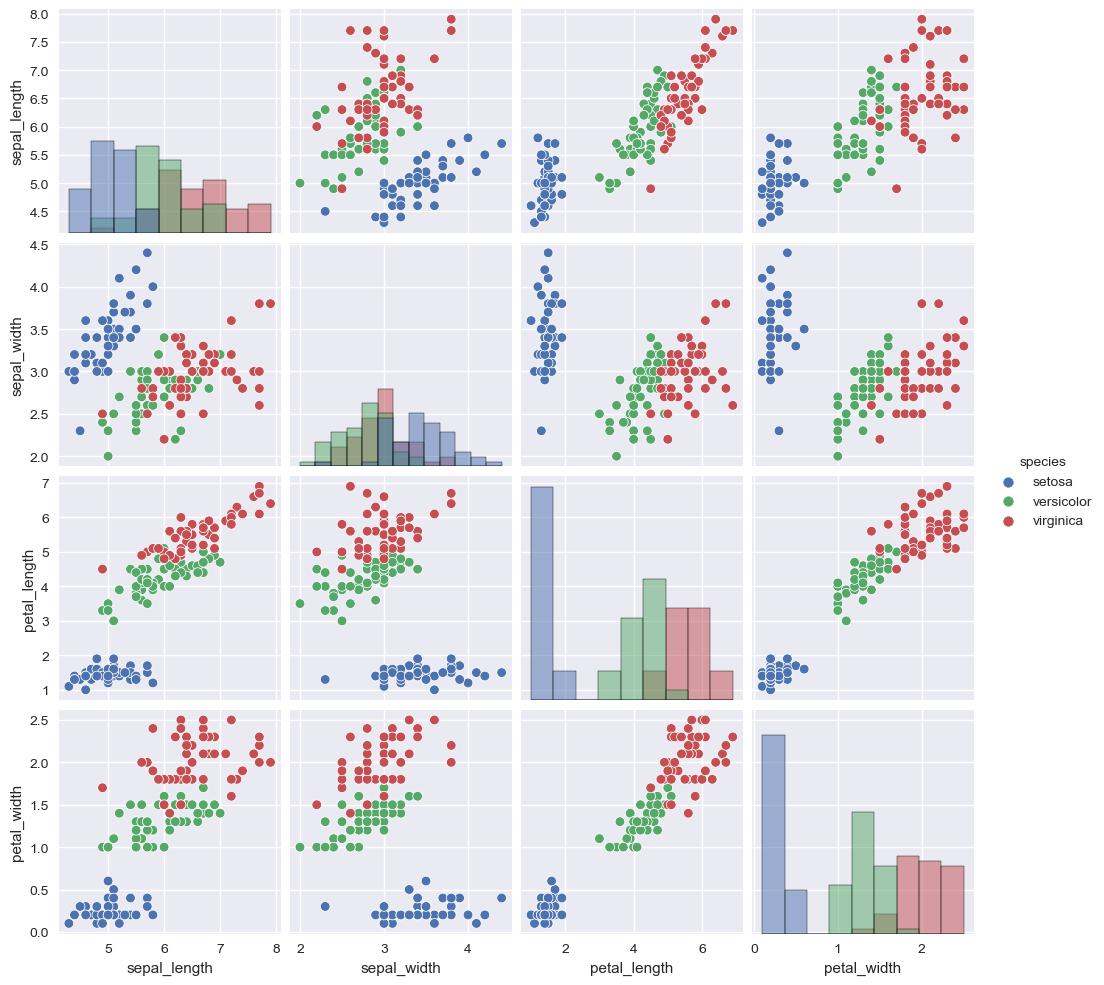

In [11]:
# init the plot
plt.figure(figsize=(10, 10))

# load the dataset also available in seaborn
iris_plot = sns.load_dataset("iris")

# plot a pairplot of the distinct feature distributions
sns.pairplot(iris_plot, diag_kind='hist', hue='species');

It can be observed from the created Pairplot, that most of the feature measurements that correspond to flower class "setosa" exhibit a nice **linear seperability** from the feature measurements of the remaining flower classes. In addition, the flower classes "versicolor" and "virginica" exhibit a commingled and **non-linear seperability** across all the measured feature distributions of the Iris Dataset.

### 3.2 Dataset Pre-Processing

To understand and evaluate the performance of any trained **supervised machine learning** model, it is good practice to divide the dataset into a **training set** (the fraction of data records solely used for training purposes) and a **evaluation set** (the fraction of data records solely used for evaluation purposes). Please note that the **evaluation set** will never be shown to the model as part of the training process.

<img align="center" style="max-width: 500px; height: auto" src="https://raw.githubusercontent.com/HSG-AIML-Teaching/EMBA2026-Lab/main/lab_03/train_eval_dataset.png">

We set the fraction of evaluation records to **30%** of the original dataset:

In [12]:
eval_fraction = 0.3

Furthermore, let's set a random seed to insure reproducibility of the train-test split in potential future runs of the notebook:

In [13]:
seed = 42

Why 42? Well, in the **Hitchhiker's Guide to the Galaxy by Douglas Adams**, the *"Answer to the Ultimate Question of Life, the Universe, and Everything"*, calculated by an enormous supercomputer named Deep Thought over a period of 7.5 million years.

Let's now continue by randomly splitting the dataset into training set and evaluation set using sklearn's `train_test_split` function:

In [14]:
# 70% training and 30% evaluation
x_train, x_eval, y_train, y_eval = train_test_split(iris.data, iris.target, test_size=eval_fraction, random_state=seed)

Evaluate the training set dimensionalities:

In [15]:
x_train.shape, y_train.shape

((105, 4), (105,))

Evaluate the evaluation set dimensionalities:

In [16]:
x_eval.shape, y_eval.shape

((45, 4), (45,))

## 4. Gaussian Naive-Bayes (NB) Classification

One popular (and remarkably simple) algorithm is the **Naive Bayes Classifier**. Note, that one natural way to adress a given classification task is via the probabilistic question: **"What is the most likely class $c^{*}$ considering all the available information $x$?"** Formally, we wish to output a conditional probability $P(c|x)$ for each class $c$ given distinct observations of $x$. Once we obtained such conditional probability for each class we select the class $c^{*}$ corresponding to the highest $P(c|x)$ as expressed by:

$$c^{*} = \arg \max_{c} P(c|x)$$

That would require that we need to be prepared to estimate the probability distribution $P(c | \mathbf{x})$ for every possible value of $\mathbf{x} = \{x_1, x_2, ..., x_n\}$. Here, $P(c | \mathbf{x})$ denotes the **conditional probability** that is read as  "the probability of $c$ given $\mathbf{x}$". Formally, the conditional probability is defined as 

$$P(c | \mathbf{x}) = \frac{P(c, \mathbf{x})}{P(\mathbf{x})}$$

Where $P(c, \mathbf{x})$ refers to the **joint probability** of $c$ and $\mathbf{x}$ occurring at the same time.

**Excursion:** Imagine a document classification system that, depending on the occurance of a particular set of words in a document, predicts the class of the document. For example, if a the words **"recipe"**, **"pumpkin"**, **"cuisine"**, **"pancakes"**, etc. appear in the document, the classifier predicts a high probability of the document beeing a cookbook. Let's assume that the feature $x_{pancake} = 1$ might signify that the word **"pancakes"** appears in a given document and $x_{pancake} = 0$ would signify that it does not. If we had **30** such binary **"word-appearence" features**, that would mean that we need to be prepared to calculate the probability $P(c | \mathbf{x})$ of any of $2^{30}$ (over 1 billion) possible values of the input vector $\mathbf{x}= \{x_1, x_2, ..., x_{30}\}$:

$$\mathbf{x^{1}}= \{x_1=1, x_2=0, x_3=0, x_4=0, x_5=0, x_6=0, ..., x_{29}=0, x_{30}=0\}$$
$$\mathbf{x^{2}}= \{x_1=1, x_2=1, x_3=0, x_4=0, x_5=0, x_6=0, ..., x_{29}=0, x_{30}=0\}$$
$$\mathbf{x^{3}}= \{x_1=1, x_2=1, x_3=1, x_4=0, x_5=0, x_6=0, ..., x_{29}=0, x_{30}=0\}$$
$$...$$
$$...$$
$$\mathbf{x^{2^{30}-1}}= \{x_1=1, x_2=1, x_3=1, x_4=1, x_5=1, x_6=1, ..., x_{29}=0, x_{30}=1\}$$
$$\mathbf{x^{2^{30}}}= \{x_1=1, x_2=1, x_3=1, x_4=1, x_5=1, x_6=1, ..., x_{29}=1, x_{30}=1\}$$

Moreover, where is the learning? If we need to see every single possible example in order to predict the corresponding label then we're not really learning a pattern but just memorizing the dataset. One solution to this challenge is the so-called **Bayes' theorem** (alternatively Bayes' law or Bayes' rule) that you learned about in the lecture. A common scenario for applying the Bayes' theorem formula is when you want to know the probability of something “unobservable” (e.g., the class $c$ of a document) given an “observed” event (e.g., the distinct words $x$ contained in the document). Such a probability is usually referred to as **posterior probability** mathematically denoted by $P(c|x)$.

The formula from Bayes' theorem provides an elegant way of calculating such posterior probabilities $P(c|x)$ without the need of observing every single possible configuration of $\mathbf{x} = \{x_1, x_2, ..., x_n\}$. Let's briefly revisit the formula of the Bayes' theorem below:

<img align="center" style="max-width: 400px; height: auto" src="https://raw.githubusercontent.com/HSG-AIML-Teaching/EMBA2026-Lab/main/lab_03/bayes_theorem.png">

In the formula of the **Bayes' theorem** above,

>- $P(c|x)$ denotes the **posterior** probability of class $c$ given a set of features $x$ denoted by $x_1, x_2, ..., x_n$.
>- $P(c)$ denotes the **prior** probability of observing class $c$.
>- $P(x|c)$ denotes the **likelihood** which is the probability of a feature $x$ given class $c$.
>- $P(x)$ denotes the **evidence** which is the general probability of observing feature $x$.

### 4.1 Calculation of the prior probabilities $P(c)$ of each class

Let's build an intuition of the Bayes' theorem by first calculating the prior probability $P(c)$ of each class iris flower contained in the dataset. Therefore, we first obtain the number of occurance of each class in the extracted training data:

In [17]:
# determine counts of unique class labels
unique, counts = np.unique(y_train, return_counts=True)

# concatenate counts and class labels in a python dictionary
class_counts = dict(zip(unique, counts))

# print obtained dictionary
print(class_counts)

{0: 31, 1: 37, 2: 37}


Let's convert the obtained counts into probabilites. Therefore, we divide the class counts by the overall number of observations contained in the extracted training data:

In [18]:
# divide counts by the number of observations available in the training data
prior_probabilities = counts / np.sum(counts)

# print obtained probabilites
print(prior_probabilities)

[0.2952381  0.35238095 0.35238095]


Let's plot the obtained prior probabilites $P(c)$ accordingly:

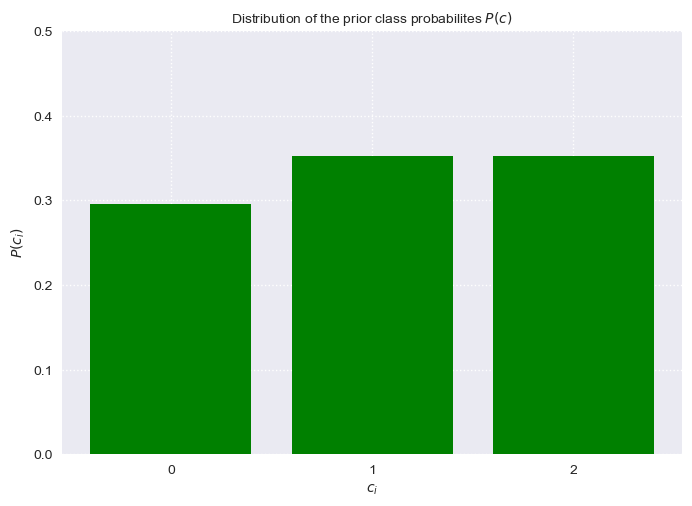

In [19]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot histogram of "sepal length" observations
ax.bar(x=np.unique(iris.target), height=prior_probabilities, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$c_{i}$", fontsize=10)
ax.set_ylabel("$P(c_{i})$", fontsize=10)

# set x-axis ticks
ax.set_xticks(np.unique(iris.target))

# set y-axis range
ax.set_ylim([0.0, 0.5])

# add plot title
ax.set_title('Distribution of the prior class probabilites $P(c)$', fontsize=10);

### 4.2 Calculation of the evidence $P(x)$ of each feature

Let's now calculate the general probability of observing a particular observation $𝑥$ which from A Bayes' theorem perspective denotes the evidence $P(\mathbf{x})$ of an observation $x=\{x_1, x_2, ..., x_n\}$. We assume that the first feature $x_{1}$ represents the "sepal length" observations of the Iris Dataset, the second feature $x_{2}$ = "sepal width", $x_{3}$ = "petal length", and $x_{4}$ = "petal width". In order to calculate the evidence $P(x)$ of a particular observation, e.g, $x=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}$ the Bayes' theorem in general utilizes the following two tricks:

**Trick 1: "Conditional Independence"** 

Using the **"Chain Rule of Probabilities"**, we can express the evidence term $P( \mathbf{x} )$ as:

$$P( \mathbf{x}) = P(\{x_1, x_2, ..., x_n\}) = P(x_1) \cdot P(x_2 | x_1) \cdot P(x_3 | x_1, x_2) \cdot P(x_4 | x_1, x_2, x_3) \cdot ... \cdot P( x_n | x_1, ..., x_{n-1}) = \prod^n_i P(x_i | x_{1:i-1})$$

By itself, this expression doesn't get us any further. We still need, even in a case of $d$ binary features, to estimate roughly $2^d$ parameters. The trick of the **naive** Bayes theorem however is to assume that the distinct features $x_1, x_2, ..., x_n$ are conditionally independent from each other when observing a particular class $c$. Using this assumption we're in much better shape, as the evidence term $P(\mathbf{x})$ simplifies to: 

$$P( \mathbf{x}) = P(\{x_1, x_2, ..., x_n\}) = P(x_1) \cdot P(x_2) \cdot P(x_3) \cdot P(x_4) \cdot ... \cdot P( x_n ) = \prod^n_i P(x_i)$$

Estimating each evidence term $\prod^n_i P(x_i)$ amounts to estimating the distribution of each feature $x_i$ independently. As a result, the assumption of conditional independence reduced the complexity of our model (in terms of the number of parameters) from an exponentially growing dependence in the number of features to a linear growing dependence. Hence, we call it the **"naive"** Bayes' theorem, since it makes the naive assumption about feature independence, so we don't have to care about dependencies among them.

**Trick 2: "Law of Large Numbers"** 

During the lecture you learned that evidence distribution can be approximated by a Gaussian (Normal) probability distribution $\mathcal{N}(\mu, \sigma)$. This simplification can be justified by the application of the "Law of Large Numbers" or "Central Limit Theorem" (you may want to have a look at further details of the theorem under: https://en.wikipedia.org/wiki/Central_limit_theorem). In general, the probability density of a Gaussian "Normal" distribution, as defined by the formula below, is parametrized its **mean $\mu$** and corresponding **standard deviation $\sigma$**:

<img align="center" style="max-width: 500px; height: auto" src="https://raw.githubusercontent.com/HSG-AIML-Teaching/EMBA2026-Lab/main/lab_03/evidence_calculation.png">

Using the **"Law of Large Numbers"** we will approximate the evidence probability density $P(x) \approx \mathcal{N}(x | \mu, \sigma)$ of each of each feature $x_i$ by a Gaussian. To achieve this we need to come up with a good estimate of the parameters $\mu$ and $\sigma$ that define a Gaussian (Normal) probability distribution.

But how can this be achieved in practice? Let's start by inspecting the true probability density of the **sepal length** feature (the first feature) of the Iris Dataset. The following line of code determines a histogram of the true **sepal length** feature value distribution and plots it accordingly:

In [20]:
# determine a histogram of the "sepal length" feature value distribution
hist_probabilities, hist_edges = np.histogram(x_train[:, 0], bins=10, range=(0,10), density=True)

# print the histogram feature value probabilites
print(hist_probabilities)

# print the histogram edges
print(hist_edges)

[0.         0.         0.         0.         0.13333333 0.42857143
 0.33333333 0.1047619  0.         0.        ]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Let's also plot the probability density accordingly:

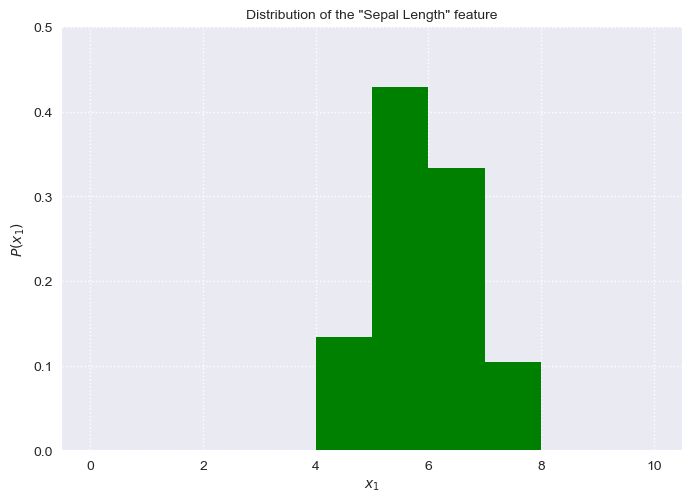

In [21]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot histogram of "sepal length" observations
ax.hist(x_train[:, 0], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{1}$", fontsize=10)
ax.set_ylabel("$P(x_{1})$", fontsize=10)

ax.set_ylim([0.0, 0.5])

# add plot title
ax.set_title('Distribution of the "Sepal Length" feature', fontsize=10);

How can we approximate the true probability density of the **sepal length** feature using a Gaussian distribution? Well, all we need to do is to calculate it's mean $\mu$ and standard deviation $\sigma$. Let's start by calculating the mean $\mu$ of the **sepal length** feature:

In [22]:
# calculate the mean of the sepal length observations
mean_sepal_length = np.mean(x_train[:, 0])

# print the obtained mean
print(mean_sepal_length)

5.8428571428571425


Let's continue by calculating the standard devition $\sigma$ of the **sepal length** feature:

In [23]:
# calculate the standard deviation of the sepal length observations
std_sepal_length = np.std(x_train[:, 0])

# print the obtained standard deviation
print(std_sepal_length)

0.8293264212149339


We can now determine the approximate Gaussian (Normal) probability density distribution $\mathcal{N}(\mu, \sigma)$ of the **sepal length** feature using the $\mu$ and $\sigma$ obtained above. Thereby, we will utilize the `pdf.norm` function available in the `scipy.stats` package:

In [24]:
# calculate the probability density function of the Gaussian distribution
hist_gauss_sepal_length = norm.pdf(np.arange(0, 10, 0.1), mean_sepal_length, std_sepal_length)

# print obtained probabilities
print(hist_gauss_sepal_length)

[8.01301016e-12 1.86029102e-11 4.25649052e-11 9.59860307e-11
 2.13329039e-10 4.67280334e-10 1.00876641e-09 2.14629446e-09
 4.50063276e-09 9.30129531e-09 1.89451859e-08 3.80311880e-08
 7.52430678e-08 1.46716406e-07 2.81952822e-07 5.34022795e-07
 9.96847508e-07 1.83393206e-06 3.32524262e-06 5.94222397e-06
 1.04655071e-05 1.81659084e-05 3.10770328e-05 5.23971366e-05
 8.70685164e-05 1.42593693e-04 2.30157468e-04 3.66130078e-04
 5.74025688e-04 8.86977961e-04 1.35076535e-03 2.02736796e-03
 2.99896106e-03 4.37214602e-03 6.28208880e-03 8.89608792e-03
 1.24159411e-02 1.70783458e-02 2.31524815e-02 3.09339137e-02
 4.07340673e-02 5.28647601e-02 6.76176911e-02 8.52393228e-02
 1.05902260e-01 1.29674937e-01 1.56492110e-01 1.86129164e-01
 2.18183545e-01 2.52066505e-01 2.87007912e-01 3.22075865e-01
 3.56211614e-01 3.88278687e-01 4.17123455e-01 4.41642899e-01
 4.60854121e-01 4.73959553e-01 4.80401847e-01 4.79903192e-01
 4.72485180e-01 4.58467259e-01 4.38443911e-01 4.13242845e-01
 3.83868278e-01 3.514347

Let's now plot the approximate Gaussian (Normal) probability density distribution $P(\mathbf{x}) \approx \mathcal{N}(\mu, \sigma)$ of the **sepal length** feature:

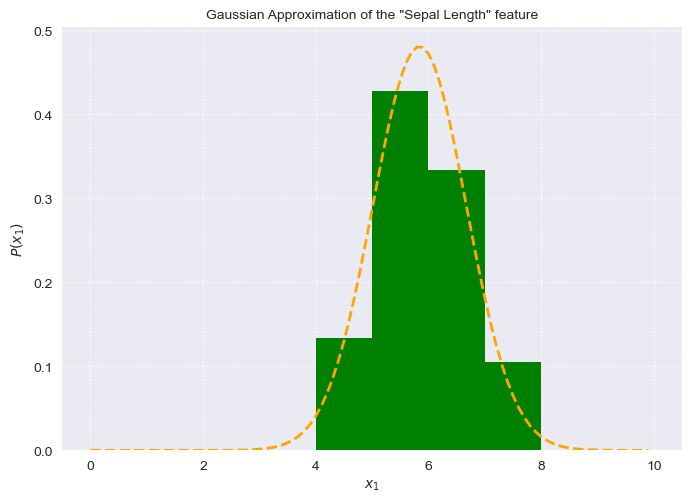

In [25]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), hist_gauss_sepal_length, color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations
ax.hist(x_train[:, 0], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_1$", fontsize=10)
ax.set_ylabel("$P(x_{1})$", fontsize=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Sepal Length" feature', fontsize=10);

Let's likewise approximate the Gaussian (Normal) probability density distribution $P(\mathbf{x}) \approx \mathcal{N}(\mu, \sigma)$ of the **sepal width** feature and plot its distribution:

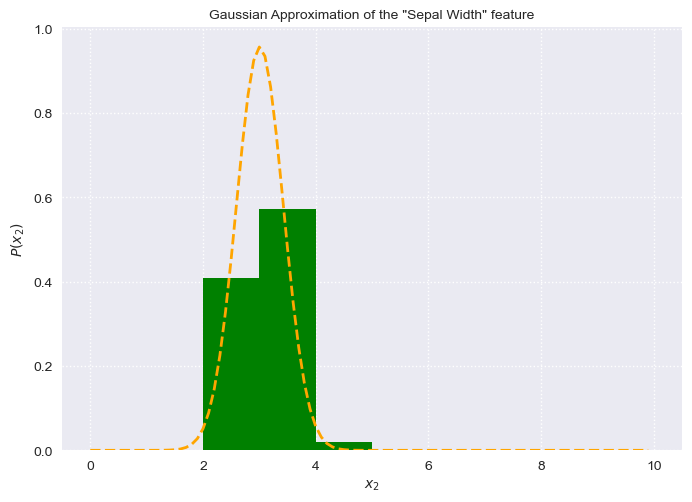

In [26]:
# determine mean and std of the "sepal width" feature
mean_sepal_width = np.mean(x_train[:, 1])
std_sepal_width = np.std(x_train[:, 1])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_sepal_width, std_sepal_width), color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal width" observations
ax.hist(x_train[:, 1], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{2}$", fontsize=10)
ax.set_ylabel("$P(x_{2})$", fontsize=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Sepal Width" feature', fontsize=10);

And approximate the Gaussian (Normal) probability density distribution $P(\mathbf{x}) \approx \mathcal{N}(\mu, \sigma)$ of the **petal length** feature and plot its distribution:

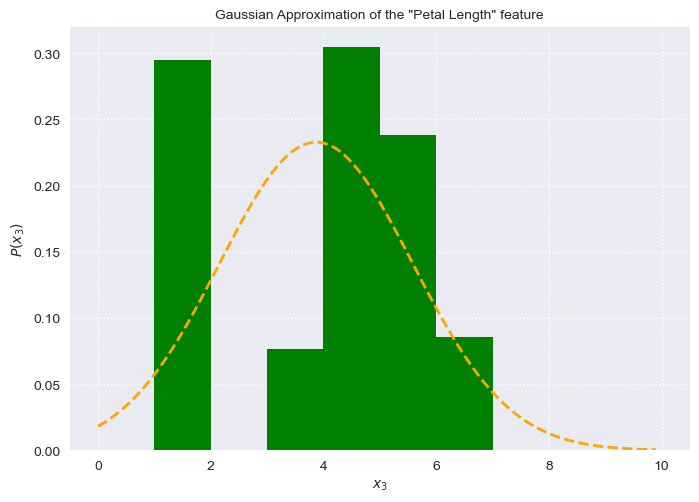

In [27]:
# determine mean and std of the "petal length" feature
mean_petal_length = np.mean(x_train[:, 2])
std_petal_length = np.std(x_train[:, 2])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_petal_length, std_petal_length), color='orange', linestyle='--', linewidth=2)

# plot histogram of "petal length" observations
ax.hist(x_train[:, 2], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{3}$", fontsize=10)
ax.set_ylabel("$P(x_{3})$", fontsize=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Petal Length" feature', fontsize=10);

And approximate the Gaussian (Normal) probability density distribution $P(\mathbf{x}) \approx \mathcal{N}(\mu, \sigma)$ of the **petal width** feature and plot its distribution:

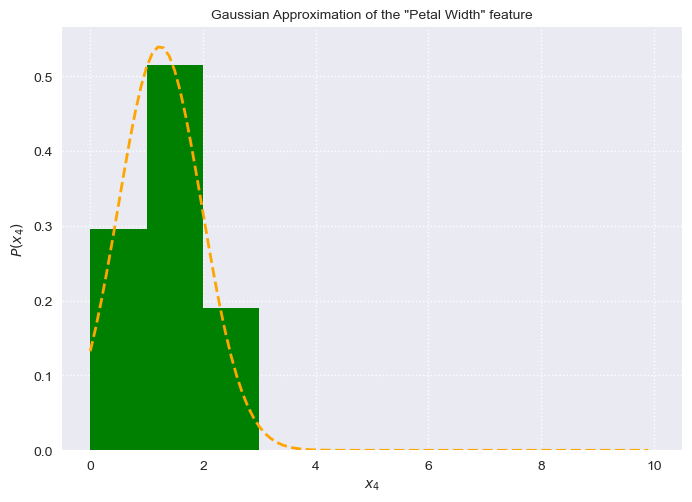

In [28]:
# determine mean and std of the "petal width" feature
mean_petal_width = np.mean(x_train[:, 3])
std_petal_width = np.std(x_train[:, 3])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_petal_width, std_petal_width), color='orange', linestyle='--', linewidth=2)

# plot histogram of "petal width" observations
ax.hist(x_train[:, 3], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{4}$", fontsize=10)
ax.set_ylabel("$P(x_{4})$", fontsize=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Petal Width" feature', fontsize=10);

### 4.3 Calculation of the likelihood $P(x|c)$ of each feature

Let's now see how we can calculate the **likelihood** $P(\mathbf{x}|c)$ which is the probability density of a feature given a particular class $c$. We will again make use of the two tricks that we applied when calculating the **evidence** $P(x)$ probabilities. In order to calculate the likelihood $P(x|c)$ of a particular observation, e.g, $x=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5 | c="setosa"\}$ we will apply:

**Trick 1: "Conditional Independence"**, using the **"Chain Rule of Probabilities"**, we can express the likelihood term $P( \mathbf{x} | c)$ as:

$$P( \mathbf{x} | c) = P(\{x_1, x_2, ..., x_n\} | c) = P(x_1, c) \cdot P(x_2 | x_1, c) \cdot P(x_3 | x_1, x_2, c) \cdot P(x_4 | x_1, x_2, x_3, c) \cdot ... \cdot = \prod^n_i P(x_i | x_{1:i-1}, c)$$

We will again assume that the distinct features $x_1, x_2, ..., x_n$ are conditionally independent from each other when observing a particular class $c$. As a result the likelihood term $P( \mathbf{x} | c)$ simplifies to: 

$$P( \mathbf{x} | c) = P(\{x_1, x_2, ..., x_n\} | c) = P(x_1 | c) \cdot P(x_2 | c) \cdot P(x_3 | c) \cdot P(x_4 | c) \cdot ... \cdot P( x_n | c) = \prod^n_i P(x_i | c)$$

Estimating each evidence term $\prod^n_i P(x_i | c)$ amounts to estimating the distribution of each feature $x_i$ independently.

**Trick 2: "Law of Large Numbers"**, using this simplification we can can estimate $P(\mathbf{x}|c)$ by a Gaussian (Normal) probability distribution $\mathcal{N}(\mu, \sigma)$. The **likelihood** probability density of a Gaussian "Normal" distribution, as defined by the formula below, is determined by its mean $\mu$, standard deviation $\sigma$ and it's corresponding class condition $c$:

<img align="center" style="max-width: 500px; height: auto" src="https://raw.githubusercontent.com/HSG-AIML-Teaching/EMBA2026-Lab/main/lab_03/likelihood_calculation.png">

Using the **"Law of Large Numbers"** we will approximate the likelihood probability density $P(x | c) \approx \mathcal{N}(x | \mu, \sigma, c)$ of each of each feature $x_i$ by a Gaussian. To achieve this we need to come up with a good estimate of the parameters $\mu$ and $\sigma$ that define a Gaussian (Normal) probability distribution.

But how can this be achieved in practice? Let's start by applying the class conditioning. This is usually done by filtering the dataset for each class $c$:

In [29]:
# collect all iris setosa measurements, class label = 0
x_train_setosa = x_train[y_train == 0]

# collect all iris versicolor measurements, class label = 1
x_train_versicolor = x_train[y_train == 1]

# collect all iris virginica measurements, class label = 2
x_train_virginica = x_train[y_train == 2]

Let's start by inspecting the true probability density of the **sepal length** feature (the first feature) of the iris dataset given the class **setosa**. The following line of code determines a histogram of the true feature value distribution:

In [30]:
# determine a histogram of the "sepal length" feature value distribution given the class "setosa"
hist_setosa, bin_edges_setosa = np.histogram(x_train_setosa[:, 0], bins=10, range=(0, 10), density=True)

# print the histogram feature value probabilites
print(hist_setosa)

# print the histogram edges
print(bin_edges_setosa)

[0.         0.         0.         0.         0.38709677 0.61290323
 0.         0.         0.         0.        ]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Let's also plot the probability density accordingly:

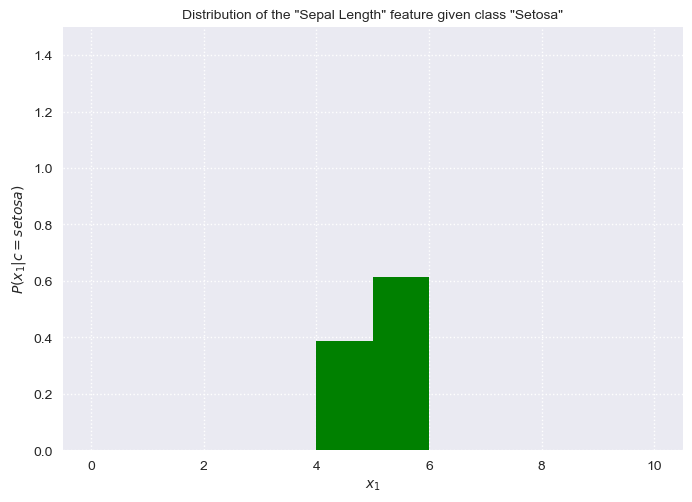

In [31]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 0], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{1}$", fontsize=10)
ax.set_ylabel("$P(x_{1}|c=setosa)$", fontsize=10)
ax.set_ylim([0.0, 1.5])

# add plot title
ax.set_title('Distribution of the "Sepal Length" feature given class "Setosa"', fontsize=10);

We are again able to determine the approximate Gaussian (Normal) probability density distribution $\mathcal{N}(\mu, \sigma, c)$ of the **sepal length** feature given the class **setosa** using the $\mu$ and $\sigma$ obtained above as well as the `pdf.norm` function of the `scipy.stats` package.

Let's continue by calculating the mean $\mu$ of the **sepal length** feature given the class **setosa**:

In [32]:
# calculate the mean of the sepal length observations given class "setosa"
mean_sepal_length_setosa = np.mean(x_train_setosa[:, 0])

# print the obtained mean
print(mean_sepal_length_setosa)

4.964516129032259


Let's continue by calculating the standard devition $\sigma$ of the **sepal length** feature given the class **setosa**:

In [33]:
# calculate the standard deviation of the sepal length observations given class "setosa"
std_sepal_length_setosa = np.std(x_train_setosa[:, 0])

# print the obtained standard deviation
print(std_sepal_length_setosa)

0.3346142575455468


In [34]:
# calculate the probability density function of the Gaussian distribution
hist_gauss_sepal_length_setosa = norm.pdf(np.arange(0, 10, 0.1), mean_sepal_length_setosa, std_sepal_length_setosa)

# print obtained probabilities
print(hist_gauss_sepal_length_setosa)

[1.89371035e-48 1.52597518e-46 1.12458830e-44 7.57969668e-43
 4.67220906e-41 2.63393397e-39 1.35799970e-37 6.40334116e-36
 2.76137750e-34 1.08907327e-32 3.92826330e-31 1.29585454e-29
 3.90952592e-28 1.07870853e-26 2.72205129e-25 6.28203961e-24
 1.32591966e-22 2.55944574e-21 4.51842230e-20 7.29524505e-19
 1.07722178e-17 1.45473049e-16 1.79668579e-15 2.02942917e-14
 2.09646608e-13 1.98067835e-12 1.71140283e-11 1.35239237e-10
 9.77384288e-10 6.46011381e-09 3.90505505e-08 2.15886918e-07
 1.09153500e-06 5.04732399e-06 2.13450351e-05 8.25552581e-05
 2.92014744e-04 9.44663198e-04 2.79486855e-03 7.56237054e-03
 1.87140030e-02 4.23533346e-02 8.76638824e-02 1.65945686e-01
 2.87291917e-01 4.54875999e-01 6.58680511e-01 8.72305839e-01
 1.05651318e+00 1.17028930e+00 1.18556051e+00 1.09841484e+00
 9.30724686e-01 7.21254023e-01 5.11172450e-01 3.31328508e-01
 1.96409435e-01 1.06482456e-01 5.27965996e-02 2.39412057e-02
 9.92883419e-03 3.76584702e-03 1.30628898e-03 4.14407904e-04
 1.20244464e-04 3.190377

Let's now plot the approximate Gaussian (Normal) probability density distribution $P(\mathbf{x} | c) \approx \mathcal{N}(\mu, \sigma, c)$ of the **sepal length** feature given class **setosa**:

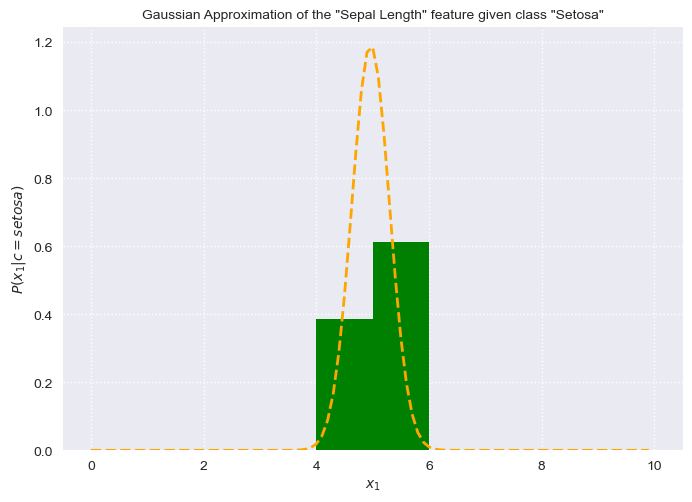

In [35]:
# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), hist_gauss_sepal_length_setosa, color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 0], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{1}$", fontsize=10)
ax.set_ylabel("$P(x_{1}|c=setosa)$", fontsize=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Sepal Length" feature given class "Setosa"', fontsize=10);

Let's likewise approximate Gaussian (Normal) probability density distribution $P(\mathbf{x} | c) \approx \mathcal{N}(\mu, \sigma, c)$ of the **sepal width** feature given class **setosa** and plot its distribution:

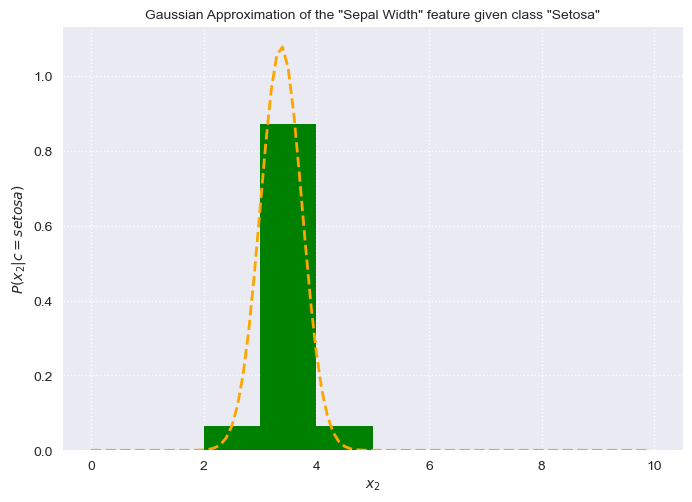

In [36]:
# determine mean and std of the "sepal width" feature given class setosa
mean_sepal_width_setosa = np.mean(x_train_setosa[:, 1])
std_sepal_width_setosa = np.std(x_train_setosa[:, 1])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_sepal_width_setosa, std_sepal_width_setosa), color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 1], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{2}$", fontsize=10)
ax.set_ylabel("$P(x_{2}|c=setosa)$", fontsize=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Sepal Width" feature given class "Setosa"', fontsize=10);

And approximate Gaussian (Normal) probability density distribution $P(\mathbf{x} | c) \approx \mathcal{N}(\mu, \sigma, c)$ of the **petal length** feature given class **setosa** and plot its distribution:

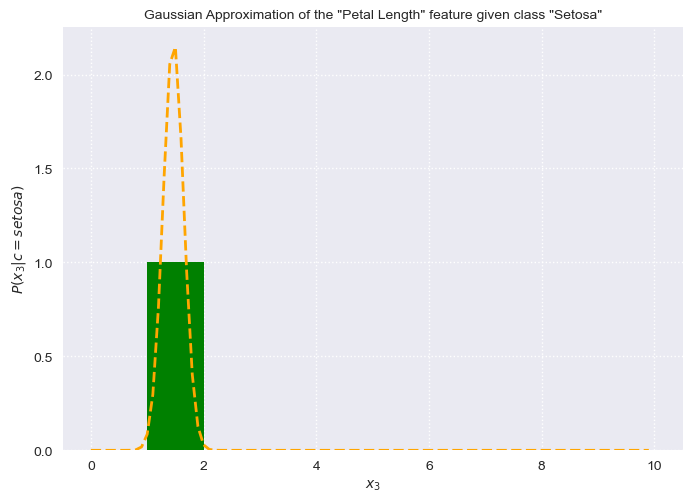

In [37]:
# determine mean and std of the "petal length" feature given class setosa
mean_petal_length_setosa = np.mean(x_train_setosa[:, 2])
std_petal_length_setosa = np.std(x_train_setosa[:, 2])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_petal_length_setosa, std_petal_length_setosa), color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 2], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{3}$", fontsize=10)
ax.set_ylabel("$P(x_{3}|c=setosa)$", fontsize=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Petal Length" feature given class "Setosa"', fontsize=10);

And approximate Gaussian (Normal) probability density distribution $P(\mathbf{x} | c) \approx \mathcal{N}(\mu, \sigma, c)$ of the **petal width** feature given class **setosa** and plot its distribution:

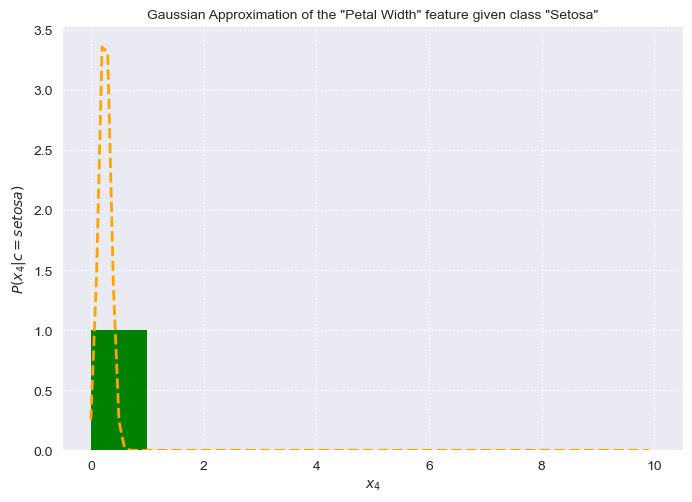

In [38]:
# determine mean and std of the "petal width" feature given class setosa
mean_petal_width_setosa = np.mean(x_train_setosa[:, 3])
std_petal_width_setosa = np.std(x_train_setosa[:, 3])

# prepare plot
fig = plt.figure()
ax = fig.add_subplot(111)

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(0, 10, 0.1), norm.pdf(np.arange(0, 10, 0.1), mean_petal_width_setosa, std_petal_width_setosa), color='orange', linestyle='--', linewidth=2)

# plot histogram of "sepal length" observations given the class "setosa"
ax.hist(x_train_setosa[:, 3], bins=10, range=(0, 10), density=True, color='green')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("$x_{4}$", fontsize=10)
ax.set_ylabel("$P(x_{4}|c=setosa)$", fontsize=10)

# add plot title
ax.set_title('Gaussian Approximation of the "Petal Width" feature given class "Setosa"', fontsize=10);

Compute mean and standard deviations of the **'versicolor'** class distributions:

In [39]:
# calculate the mean and std of the sepal length feature given class 'versicolor'
mean_sepal_length_versicolor = np.mean(x_train_versicolor[:, 0])
std_sepal_length_versicolor = np.std(x_train_versicolor[:, 0])

# calculate the mean and std of the sepal width feature given class 'versicolor'
mean_sepal_width_versicolor = np.mean(x_train_versicolor[:, 1])
std_sepal_width_versicolor = np.std(x_train_versicolor[:, 1])

# calculate the mean and std of the petal length width feature given class 'versicolor'
mean_petal_length_versicolor = np.mean(x_train_versicolor[:, 2])
std_petal_length_versicolor = np.std(x_train_versicolor[:, 2])

# calculate the mean and std of the petal width feature given class 'versicolor'
mean_petal_width_versicolor = np.mean(x_train_versicolor[:, 3])
std_petal_width_versicolor = np.std(x_train_versicolor[:, 3])

Compute mean and standard deviations of the **'virginica'** class distributions:

In [40]:
# calculate the mean and std of the sepal length feature given class 'virginica'
mean_sepal_length_virginica = np.mean(x_train_virginica[:, 0])
std_sepal_length_virginica = np.std(x_train_virginica[:, 0])

# calculate the mean and std of the sepal width feature given class 'virginica'
mean_sepal_width_virginica = np.mean(x_train_virginica[:, 1])
std_sepal_width_virginica = np.std(x_train_virginica[:, 1])

# calculate the mean and std of the petal length width feature given class 'virginica'
mean_petal_length_virginica = np.mean(x_train_virginica[:, 2])
std_petal_length_virginica = np.std(x_train_virginica[:, 2])

# calculate the mean and std of the petal width feature given class 'virginica'
mean_petal_width_virginica = np.mean(x_train_virginica[:, 3])
std_petal_width_virginica = np.std(x_train_virginica[:, 3])

### 4.4 Calculation of the posterior probability $P(c|x)$ of unknown iris flower observations $x^{s}$  

Now we have determined all the distinct elements $P(c)$, $P(x)$ and $P(x|c)$ of the Bayes' theorem the determine the posterior probability $P(c=setosa|x)$ of a so far unseen "new" observations x of class **setosa**. Let's therefore determine if two so far unseen **iris flower** observations correspond to class **setosa**.

<img align="center" style="max-width: 500px; height: auto" src="https://raw.githubusercontent.com/HSG-AIML-Teaching/EMBA2026-Lab/main/lab_03/iris_sample_1.png">

(Source: https://de.wikipedia.org/wiki/Schwertlilien)

The first **iris flower** observation $x^{s1}$ exhibits the following observed feature values: $x^{s1} = \{x_{1}=5.8, x_{2}=3.5, x_{3}=1.5, x_{4}=0.25\}$:

In [41]:
# init features of first iris flower observation 
sepal_length = 5.8 
sepal_width  = 3.5
petal_length = 1.5
petal_width  = 0.25

Let's build an intuition of the distinct iris flower class distributions including the current iris flower observation:

/var/folders/0x/bs2wk7sn7wbb2m25x2rt400c0000gn/T/ipykernel_14181/789620795.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iris_plot = pd.concat([iris_plot,pd.DataFrame([[5.8, 3.5, 1.5, 0.25, "observation 1"]], columns=iris_plot.columns, index=[150])])


<Figure size 1000x1000 with 0 Axes>

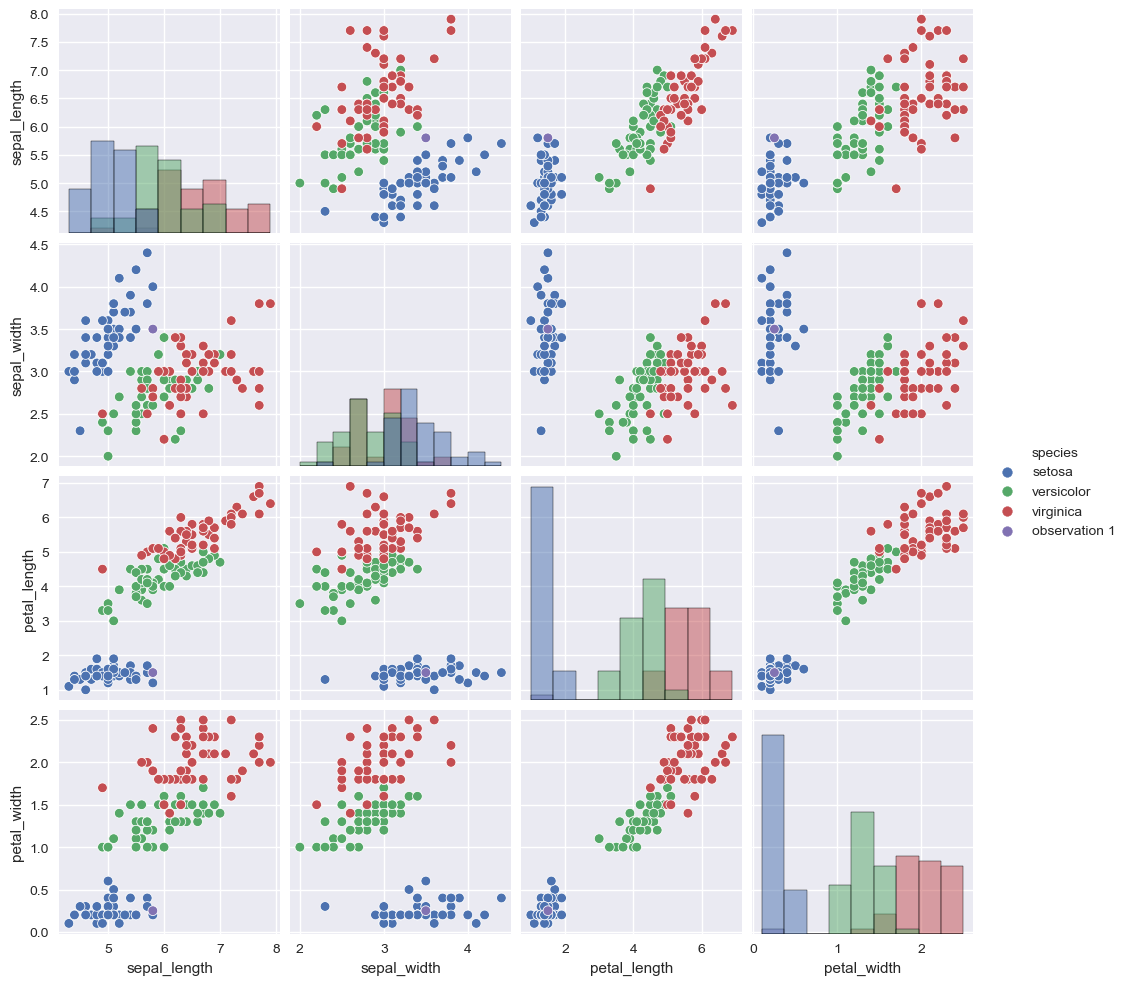

In [42]:
# init the plot
plt.figure(figsize=(10, 10))

# load the dataset also available in seaborn
iris_plot = sns.load_dataset("iris")

# add observation to the iris dataset
iris_plot = pd.concat([iris_plot,pd.DataFrame([[5.8, 3.8, 1.5, 0.25, "observation 2"]], columns=iris_plot.columns, index=[150])])

# plot a pairplot of the distinct feature distributions
sns.pairplot(iris_plot, diag_kind='hist', hue='species');

Let's determine the posterior probability $P(c=setosa|x^{s1})$:

In [43]:
# calculate the distinct elements of the Bayes theorem formula

# init the prior probability P(c='setosa')
prior = prior_probabilities[0]

# determine the likelihood probability P(x|c='setosa')
likelihood_setosa = norm.pdf(sepal_length, mean_sepal_length_setosa, std_sepal_length_setosa) * norm.pdf(sepal_width, mean_sepal_width_setosa, std_sepal_width_setosa) * norm.pdf(petal_length, mean_petal_length_setosa, std_petal_length_setosa) * norm.pdf(petal_width, mean_petal_width_setosa, std_petal_width_setosa)

# determine the likelihood probability P(x|c='versicolor')
likelihood_versicolor = norm.pdf(sepal_length, mean_sepal_length_versicolor, std_sepal_length_versicolor) * norm.pdf(sepal_width, mean_sepal_width_versicolor, std_sepal_width_versicolor) * norm.pdf(petal_length, mean_petal_length_versicolor, std_petal_length_versicolor) * norm.pdf(petal_width, mean_petal_width_versicolor, std_petal_width_versicolor)

# determine the likelihood probability P(x|c='virginica')
likelihood_virginica = norm.pdf(sepal_length, mean_sepal_length_virginica, std_sepal_length_virginica) * norm.pdf(sepal_width, mean_sepal_width_virginica, std_sepal_width_virginica) * norm.pdf(petal_length, mean_petal_length_virginica, std_petal_length_virginica) * norm.pdf(petal_width, mean_petal_width_virginica, std_petal_width_virginica)

# determine the evidence probability P(x)
evidence = likelihood_setosa * prior_probabilities[0] + likelihood_versicolor * prior_probabilities[1] + likelihood_virginica * prior_probabilities[2]

# determine the posterior probability
posterior_setosa = (prior * likelihood_setosa) / evidence

# print the obtained posterior probability
print(posterior_setosa)

0.9999999999999533


Ok, our observed iris flower results in a posterior probability $P(c=setosa|x^{s1})$ of beeing of class setosa of 27.99. For comparison purposes, let's also determine the posterior probability $P(c=versicolor|x^{s1})$ and see:

In [44]:
# calculate the distinct elements of the Bayes theorem formula

# init the prior probability P(c='versicolor')
prior = prior_probabilities[1]

# determine the likelihood probability P(x|c='versicolor')
likelihood_versicolor = norm.pdf(sepal_length, mean_sepal_length_versicolor, std_sepal_length_versicolor) * norm.pdf(sepal_width, mean_sepal_width_versicolor, std_sepal_width_versicolor) * norm.pdf(petal_length, mean_petal_length_versicolor, std_petal_length_versicolor) * norm.pdf(petal_width, mean_petal_width_versicolor, std_petal_width_versicolor)

# determine the posterior probability
posterior_versicolor = (prior * likelihood_versicolor) / evidence

# print the obtained posterior probability
print(posterior_versicolor)

4.6865898738717404e-14


As well as the posterior probability $P(c=virginica|x^{s1})$:

In [45]:
# calculate the distinct elements of the Bayes theorem formula

# init the prior probability P(c='virginica')
prior = prior_probabilities[2]

# determine the likelihood probability P(x|c='virginica')
likelihood_virginica = norm.pdf(sepal_length, mean_sepal_length_virginica, std_sepal_length_virginica) * norm.pdf(sepal_width, mean_sepal_width_virginica, std_sepal_width_virginica) * norm.pdf(petal_length, mean_petal_length_virginica, std_petal_length_virginica) * norm.pdf(petal_width, mean_petal_width_virginica, std_petal_width_virginica)

# determine the posterior probability
posterior_virginica = (prior * likelihood_virginica) / evidence

# print the obtained posterior probability
print(posterior_virginica)

2.197023008334778e-21


Based on the obtained posterior probabilites $P(c|x)$ for the distinct iris flower classes $c = \{setosa, versicolor, virginica\}$ given the unknown observation $x^{s1}=\{x_{1}=5.8, x_{2}=3.5, x_{3}=1.5, x_{4}=0.25\}$:

$$P(c=setosa|x^{s1}=\{x_{1}=5.8, x_{2}=3.5, x_{3}=1.5, x_{4}=0.25\}) = \mathbf{0.99}$$
$$P(c=versicolor|x^{s1}=\{x_{1}=5.8, x_{2}=3.5, x_{3}=1.5, x_{4}=0.25\}) = \mathbf{4.69e^{-14}}$$
$$P(c=virginica|x^{s1}=\{x_{1}=5.8, x_{2}=3.5, x_{3}=1.5, x_{4}=0.25\}) = \mathbf{2.20e^{-21}}$$

we can now apply our initial classification criteria, denoted by $\arg \max_{c} P(c|x)$ to safely determine the observation's most likely class $c^{*} = setosa$.

Let's now have a look at a second **iris flower** observation and determine its most likely class $c^{*}$:

<img align="center" style="max-width: 500px; height: auto" src="https://raw.githubusercontent.com/HSG-AIML-Teaching/EMBA2026-Lab/main/lab_03/iris_sample_2.png">


(Source: https://de.wikipedia.org/wiki/Schwertlilien)

The second **iris flower** observation $x^{s2}$ exhibits the following observed feature values: $x^{s2} = \{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}$:

In [46]:
# init a second random feature observation 
sepal_length = 7.8
sepal_width  = 2.3
petal_length = 6.4
petal_width  = 2.5

Let's again build an intuition of the distinct iris flower class distributions including the current iris flower observation:

/var/folders/0x/bs2wk7sn7wbb2m25x2rt400c0000gn/T/ipykernel_14181/1508185080.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iris_plot = pd.concat([iris_plot,pd.DataFrame([[7.8, 2.3, 6.4, 2.50, "observation 2"]], columns=iris_plot.columns, index=[150])])


<Figure size 1000x1000 with 0 Axes>

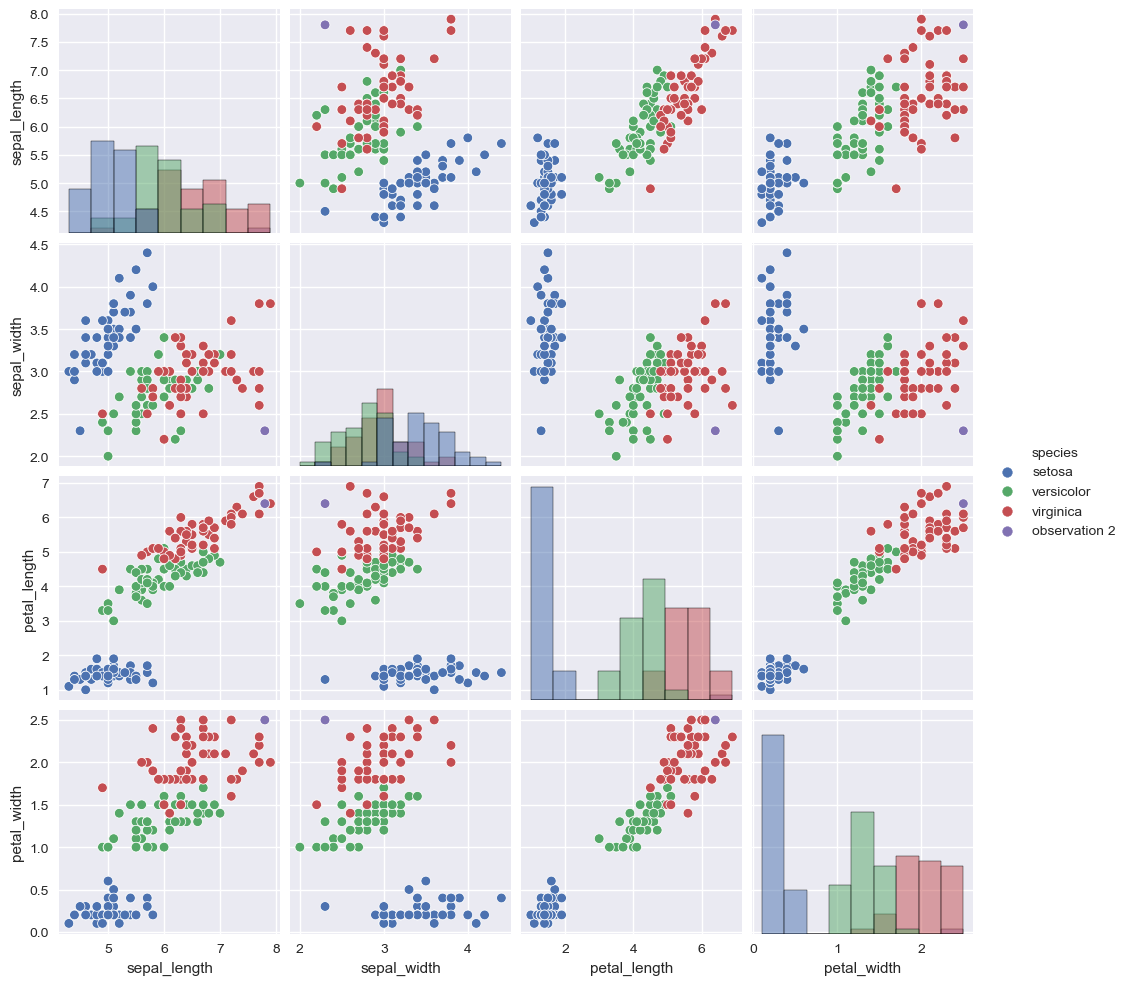

In [47]:
# init the plot
plt.figure(figsize=(10, 10))

# load the dataset also available in seaborn
iris_plot = sns.load_dataset("iris")

# add observations to the iris dataset
iris_plot = pd.concat([iris_plot,pd.DataFrame([[7.8, 2.3, 6.4, 2.50, "observation 2"]], columns=iris_plot.columns, index=[150])])

# plot a pairplot of the distinct feature distributions
sns.pairplot(iris_plot, diag_kind='hist', hue='species');

Let's determine the posterior probability $P(c=setosa|x^{s2})$:

In [48]:
# calculate the distinct elements of the Bayes theorem formula

# init the prior probability P(c='setosa')
prior = prior_probabilities[0] 

# determine the likelihood probability P(x|c='setosa')
likelihood_setosa = norm.pdf(sepal_length, mean_sepal_length_setosa, std_sepal_length_setosa) * norm.pdf(sepal_width, mean_sepal_width_setosa, std_sepal_width_setosa) * norm.pdf(petal_length, mean_petal_length_setosa, std_petal_length_setosa) * norm.pdf(petal_width, mean_petal_width_setosa, std_petal_width_setosa)

# determine the likelihood probability P(x|c='setosa')
likelihood_setosa = norm.pdf(sepal_length, mean_sepal_length_setosa, std_sepal_length_setosa) * norm.pdf(sepal_width, mean_sepal_width_setosa, std_sepal_width_setosa) * norm.pdf(petal_length, mean_petal_length_setosa, std_petal_length_setosa) * norm.pdf(petal_width, mean_petal_width_setosa, std_petal_width_setosa)

# determine the likelihood probability P(x|c='versicolor')
likelihood_versicolor = norm.pdf(sepal_length, mean_sepal_length_versicolor, std_sepal_length_versicolor) * norm.pdf(sepal_width, mean_sepal_width_versicolor, std_sepal_width_versicolor) * norm.pdf(petal_length, mean_petal_length_versicolor, std_petal_length_versicolor) * norm.pdf(petal_width, mean_petal_width_versicolor, std_petal_width_versicolor)

# determine the likelihood probability P(x|c='virginica')
likelihood_virginica = norm.pdf(sepal_length, mean_sepal_length_virginica, std_sepal_length_virginica) * norm.pdf(sepal_width, mean_sepal_width_virginica, std_sepal_width_virginica) * norm.pdf(petal_length, mean_petal_length_virginica, std_petal_length_virginica) * norm.pdf(petal_width, mean_petal_width_virginica, std_petal_width_virginica)

# determine the evidence probability P(x)
evidence = likelihood_setosa * prior_probabilities[0] + likelihood_versicolor * prior_probabilities[1] + likelihood_virginica * prior_probabilities[2]

# determine the posterior probability
posterior_setosa = (prior * likelihood_setosa) / evidence

# print the obtained posterior probability
print(posterior_setosa)

1.2363455801866644e-268


Ok, our observed iris flower results in a very low posterior probability $P(c=setosa|x^{s2})$ of beeing of class setosa of $5.02e^{-268}$. For comparison purposes, let's also determine the posterior probability $P(c=versicolor|x^{s2})$ and see:

In [49]:
# calculate the distinct elements of the Bayes theorem formula

# init the prior probability P(c='versicolor')
prior = prior_probabilities[1]

# determine the likelihood probability P(x|c='versicolor')
likelihood_versicolor = norm.pdf(sepal_length, mean_sepal_length_versicolor, std_sepal_length_versicolor) * norm.pdf(sepal_width, mean_sepal_width_versicolor, std_sepal_width_versicolor) * norm.pdf(petal_length, mean_petal_length_versicolor, std_petal_length_versicolor) * norm.pdf(petal_width, mean_petal_width_versicolor, std_petal_width_versicolor)

# determine the posterior probability
posterior_versicolor = (prior * likelihood_versicolor) / evidence

# print the obtained posterior probability
print(posterior_versicolor)

1.1162843236269123e-12


As well as the posterior probability $P(c=virginica|x^{s2})$:

In [50]:
# calculate the distinct elements of the Bayes theorem formula

# init the prior probability P(c='virginica')
prior = prior_probabilities[2]

# determine the likelihood probability P(x|c='virginica')
likelihood_virginica = norm.pdf(sepal_length, mean_sepal_length_virginica, std_sepal_length_virginica) * norm.pdf(sepal_width, mean_sepal_width_virginica, std_sepal_width_virginica) * norm.pdf(petal_length, mean_petal_length_virginica, std_petal_length_virginica) * norm.pdf(petal_width, mean_petal_width_virginica, std_petal_width_virginica)

# determine the posterior probability
posterior_virginica = (prior * likelihood_virginica) / evidence

# print the obtained posterior probability
print(posterior_virginica)

0.9999999999988837


Based on the obtained posterior probabilites $P(c|x)$ for the distinct iris flower classes $c = \{setosa, versicolor, virginica\}$ given the unknown observation $x^{s2}=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}$:

$$P(c=setosa|x^{s2}=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}) = \mathbf{1.24e^{-268}}$$
$$P(c=versicolor|x^{s2}=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}) = \mathbf{1.12e^{-12}}$$
$$P(c=virginica|x^{s2}=\{x_{1}=7.8, x_{2}=2.3, x_{3}=6.4, x_{4}=2.5\}) = \mathbf{0.99}$$

we can now apply our initial classification criteria, denoted by $\arg \max_{c} P(c|x)$ to savely determine the observations most likely class $c^{*} = virginica$.

### 4.5 Training and utilization of a Gaussian Naive-Bayes Classifier using Python's Sklearn library

Luckily, there is a Python library named `Scikit-Learn` (https://scikit-learn.org) that provides a variety of machine learning algorithms that can be easily interfaced using the Python programming language. It also contains supervised classification algorithms such as the **Gaussian Naive-Bayes** classifier which we can use of the shelf.

Let's use `Scikit-Learn` and instantiate the **Gaussian Naive-Bayes** classifier:

In [51]:
# init the Gaussian Naive Bayes classifier
gnb = GaussianNB(priors=None)

(Reference: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

Train or fit the Gaussian Naive-Bayes classifier using the training dataset features and labels:

In [52]:
# train the Gaussian Naive Bayes classifier
gnb.fit(x_train, y_train)

GaussianNB()

Utilize the trained model to predict the classes of the distinct observations contained in the evaluation dataset:

In [53]:
y_pred = gnb.predict(x_eval)

Let's have a look at the class labels **predicted** by the Gaussian Naive-Bayes classifier on the evaluation dataset:

In [54]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

As well as the **true** class labels as contained in the evaluation dataset:

In [55]:
y_eval

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

Determine the **prediction accuracy** of the trained model on the evaluation dataset:

In [56]:
print("Accuracy: ", metrics.accuracy_score(y_eval, y_pred))

Accuracy:  0.9777777777777777


Determine number of **missclassified** data sampels in the evaluation dataset:

In [57]:
print("Number of mislabeled points out of a total {} points: {}".format(x_eval.shape[0], np.sum(y_eval != y_pred)))

Number of mislabeled points out of a total 45 points: 1


In the field of machine learning and in particular the field of statistical classification, a **confusion matrix**, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the number of instances that the classifier predicted per class, while each column represents the instances of the true or actual class:

<img align="center" style="max-width: 300px; height: auto" src="https://github.com/GitiHubi/courseAIML/blob/master/lab_03/confusion_matrix.png?raw=1">

(Source: https://en.wikipedia.org/wiki/Confusion_matrix)

Determine and plot the **confusion matrix** of the individual predictions:

In [58]:
# determine the prediction confusion matrix
mat = confusion_matrix(y_eval, y_pred)

Plot the **confusion matrix** of the individual predictions:

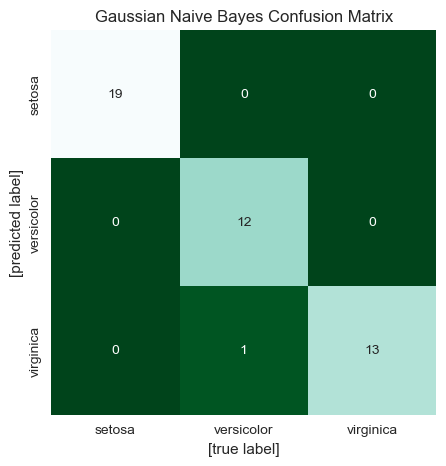

In [59]:
# init the plot
plt.figure(figsize=(5, 5))

# plot confusion matrix heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='BuGn_r', xticklabels=iris.target_names, yticklabels=iris.target_names)

# add plot axis labels
plt.xlabel('[true label]')
plt.ylabel('[predicted label]')

# add plot title
plt.title('Gaussian Naive Bayes Confusion Matrix');

Let's now use the learned model and apply it to our unknown observations $x^{s1}$ and $x^{s2}$ to determine their corresponding class predictions $c^{*}$:  

In [60]:
# determine class label prediction of the first unknown observation
class_prediction_sample_1 = gnb.predict([[5.8, 3.5, 1.5, 0.25]])

# convert predicted class label to class name
print(iris.target_names[class_prediction_sample_1[0]])

setosa


In [61]:
# determine class label prediction of the second unknown observation
class_prediction_sample_2 = gnb.predict([[7.8, 2.3, 6.4, 2.50]])

# convert predicted class label to class name
print(iris.target_names[class_prediction_sample_2[0]])

virginica


## 5. Lab Summary

In this lab, a step by step introduction into **Gaussian Naive-Bayes (GNB)** classification is presented. The code and exercises presented in this lab may serve as a starting point for more complex and tailored programs.